Градиентный спуск: коэффициенты: [-0.6467139961398986, 0.409196217686183, 0.0033836951719655927, 0.08183822290276595, 0.00043891448446330486], 0.643380135212794
Стохастический градиентный спуск: коэффициенты: [-0.6417662521896028, 0.4234727460460907, 0.009940819446858807, 0.10498674583155629, 0.015811224592570818], 0.0024342888699284432
Время выполнения градиентного спуска: 0.059 секунд
Время выполнения стохастического градиентного спуска: 0.960 секунд


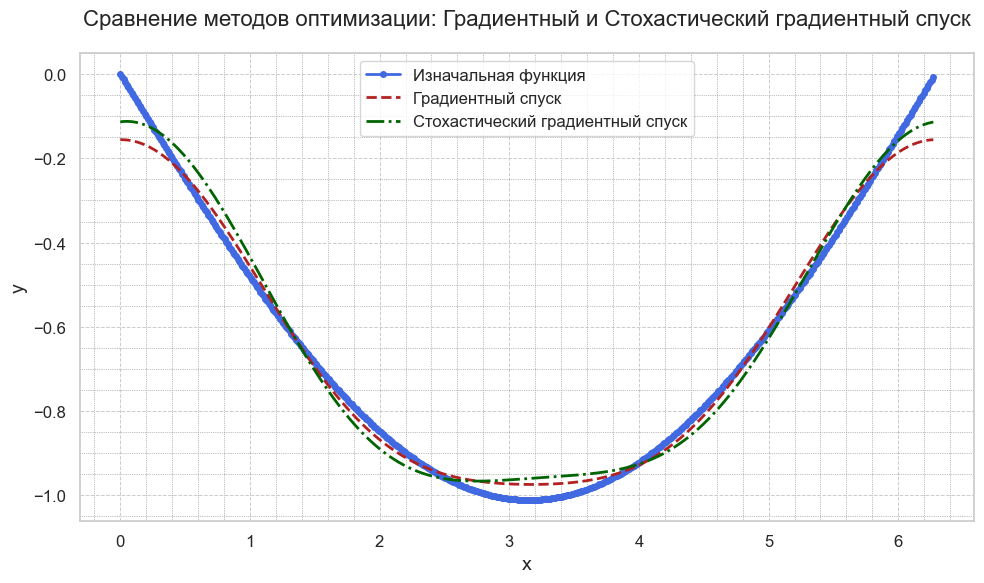

In [1]:
from math import pi, sin, cos
from dsmltf import gradient_descent, minimize_stochastic
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

# шаг времени
time_step = 2 * pi / 1000

# базовые иксы
base_x = [2 * pi * (i / 500) for i in range(500)]

# глобальные иксы для хранения данных
x_values = []

# функция Фурье
def fourier_series(k, coeffs):
    """
    Вычисляет значение ряда Фурье для заданного индекса и коэффициентов.

    Parameters:
    k (int): Индекс, по которому вычисляется значение.
    coeffs (list): Коэффициенты ряда Фурье.

    Returns:
    float: Значение ряда Фурье для индекса k.
    """
    return (coeffs[0] + coeffs[1] * cos(base_x[k]) + coeffs[2] * sin(base_x[k])
            + coeffs[3] * cos(2 * base_x[k]) + coeffs[4] * sin(2 * base_x[k]))


# функция ошибки для обычного градиентного спуска
def F(a: list) -> float:
    """
    Функция ошибки для градиентного спуска.

    Parameters:
    a (list): Текущие коэффициенты для оптимизации.

    Returns:
    float: Сумма квадратов ошибок между фактическими и предсказанными значениями ряда.
    """
    global x_values
    return sum([(x_values[j] - fourier_series(j, a)) ** 2 for j in range(500)])


# функция ошибки для стохастического градиентного спуска
def f(i, a):
    """
    Функция ошибки для стохастического градиентного спуска для одного примера.

    Parameters:
    i (int): Индекс текущего элемента данных.
    a (list): Текущие коэффициенты для оптимизации.

    Returns:
    float: Квадрат ошибки для конкретного элемента данных.
    """
    global x_values
    return (x_values[i] - fourier_series(i, a)) ** 2


# генерация исходного ряда x_values
def generate_series(k: int, omega: float, L: float):
    """
    Генерирует исходный ряд данных x_values с использованием указанных параметров.

    Parameters:
    k (int): Параметр, влияющий на начальные условия.
    omega (float): Частота колебаний.
    L (float): Параметр для динамики изменения ряда.

    Returns:
    None
    """
    global x_values
    x_values = [0, (-1) ** k * time_step]
    for i in range(2, 500):
        x_values.append(x_values[i - 1] * (2 + time_step * L * (1 - x_values[i - 2] ** 2))
                        - x_values[i - 2] * (1 + time_step ** 2 + time_step * L * (1 - x_values[i - 2] ** 2))
                        + time_step ** 2 * sin(omega * time_step))


# вычисление коэффициентов через разные методы
def compute_coefficients():
    """
    Вычисляет коэффициенты ряда Фурье с использованием обычного и стохастического градиентного спуска.

    Returns:
    tuple: Результаты для обычного градиентного спуска и стохастического градиентного спуска.
    """
    # Обычный градиентный спуск
    grad_desc_time = timeit.timeit('gradient_descent(F, [0] * 5)', globals=globals(), number=1)
    grad_desc_result = gradient_descent(F, [0] * 5)

    # Стохастический градиентный спуск
    stoch_grad_time = timeit.timeit('minimize_stochastic(f, list(range(500)), [0] * 500, [0] * 5)', globals=globals(),
                                    number=1)
    stoch_grad_result = minimize_stochastic(f, list(range(500)), [0] * 500, [0] * 5)

    # Вывод результатов
    print(f"Градиентный спуск: коэффициенты: {grad_desc_result[0]}, {grad_desc_result[1]}")
    print(f"Стохастический градиентный спуск: коэффициенты: {stoch_grad_result[0]}, {stoch_grad_result[1]}")

    # Красивый вывод времени вычислений
    print(f"Время выполнения градиентного спуска: {grad_desc_time:.3f} секунд")
    print(f"Время выполнения стохастического градиентного спуска: {stoch_grad_time:.3f} секунд")

    return grad_desc_result, stoch_grad_result


# построение графиков
def plot_results(grad_desc_result, stoch_grad_result):
    """
    Строит графики для сравнения результатов методов оптимизации.

    Parameters:
    grad_desc_result (tuple): Результаты градиентного спуска.
    stoch_grad_result (tuple): Результаты стохастического градиентного спуска.

    Returns:
    None
    """
    # Устанавливаем стиль seaborn
    sns.set(style="whitegrid")

    # Увеличим размер графика
    plt.figure(figsize=(10, 6))

    # Построение графиков
    plt.plot(base_x, x_values, label='Изначальная функция', marker='o', markersize=4, color='royalblue', linestyle='-',
             linewidth=2)
    plt.plot(base_x, [fourier_series(i, grad_desc_result[0]) for i in range(500)], label='Градиентный спуск',
             linestyle='--', color='firebrick', linewidth=2)
    plt.plot(base_x, [fourier_series(i, stoch_grad_result[0]) for i in range(500)],
             label='Стохастический градиентный спуск', linestyle='-.', color='darkgreen', linewidth=2)

    # Добавляем заголовок, метки и легенду
    plt.title('Сравнение методов оптимизации: Градиентный и Стохастический градиентный спуск', fontsize=16, pad=20)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(fontsize=12, loc='best')

    # Улучшаем внешний вид сетки
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Включаем мелкую сетку на графике
    plt.minorticks_on()
    plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

    # Устанавливаем более крупные значения для делений осей
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Показываем график
    plt.tight_layout()
    plt.show()


# основная функция
def main():
    """
    Основная функция для генерации данных, вычисления коэффициентов и построения графиков.

    Returns:
    None
    """
    k = 1
    omega = 1000 / k
    L = k / 100

    # Генерация исходного ряда x_values
    generate_series(k, omega, L)

    # Вычисление коэффициентов
    grad_desc_result, stoch_grad_result = compute_coefficients()

    # Построение графиков
    plot_results(grad_desc_result, stoch_grad_result)


if __name__ == "__main__":
    main()
